In [180]:
def show_densities(vecfun, ks,eucl = False):
    es = 1 + eucl
    fig,axes = plt.subplots(len(ks),es,figsize = (7*es,3*len(ks)))
    for ik,k in enumerate(ks):
        vecs = get_nmf_doc(k)
        dists_euclidean, dists_cosine = pdist(vecs,'euclidean'), pdist(vecs,'cosine')
        if eucl:
            sns.distplot(dists_euclidean, hist=True, ax = axes[ik,0])
            axes[ik,0].set_title('{} distances density with {} dimensions'.format('euclidean',k))
        
        if eucl:
            axc = axes[ik,1]
        else:
            axc = axes[ik]
    
        sns.distplot(dists_cosine, hist=True, ax = axc)
        axc.set_title('{} distances density with {} dimensions'.format('cosine',k))

        print('---------- k = {} ---------'.format(k))
        if eucl:
            print("Euclidean Mean = {}, Std = {}, entropy = {}".format(dists_euclidean.mean(),dists_euclidean.std(),entropy(dists_euclidean)))
        print("Cosine Mean = {}, Std = {}, entropy = {}".format(dists_cosine.mean(),dists_cosine.std(),entropy(dists_cosine)))

In [152]:
def show_stdm(vecfun,ks,metric = 'cosine'):
    stdms = list()
    for k in ks:
        vecs = vecfun(k)
        d = pdist(vecs,metric)
        stdm = d.std()/d.mean()
        stdms.append(stdm)
        print(k,stdm)
    plt.plot(ks,stdms)

In [155]:
from scipy.stats import entropy

In [162]:
def show_entropy(vecfun,ks,metric = 'cosine'):
    entropies = list()
    for k in ks:
        vecs = vecfun(k)
        d = pdist(vecs,metric)
        ent = entropy(d)
        entropies.append(ent)
        print(k,ent)
    plt.plot(ks,entropies)

2 13.184600360798033
3 13.077565965473235
5 13.172493166356322
10 13.234013407113775
20 13.252466370505305
40 13.265031506244851
100 13.257286354302575
200 13.263976888713152


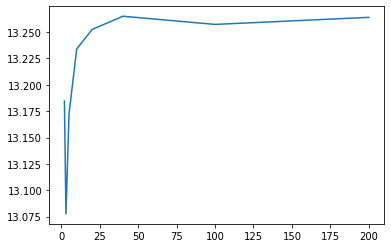

In [172]:
ks= [2,3,5,10,20,40,100,200]
show_entropy(get_nmf_doc,ks,'euclidean')

---------- k = 2 ---------
Cosine Mean = 0.35069710867672643, Std = 0.3612529182629225, entropy = 12.821664877307406
---------- k = 3 ---------
Cosine Mean = 0.3711800433067091, Std = 0.3615890586896882, entropy = 12.880295270832233
---------- k = 5 ---------
Cosine Mean = 0.5695855090335976, Std = 0.3873994897647892, entropy = 13.104967311970974
---------- k = 10 ---------
Cosine Mean = 0.7280446995212249, Std = 0.32945098622870367, entropy = 13.268707095823357
---------- k = 20 ---------
Cosine Mean = 0.7999164246376829, Std = 0.271459586423723, entropy = 13.332761275753237
---------- k = 40 ---------
Cosine Mean = 0.8628099050136301, Std = 0.21258211285667858, entropy = 13.372935019414308


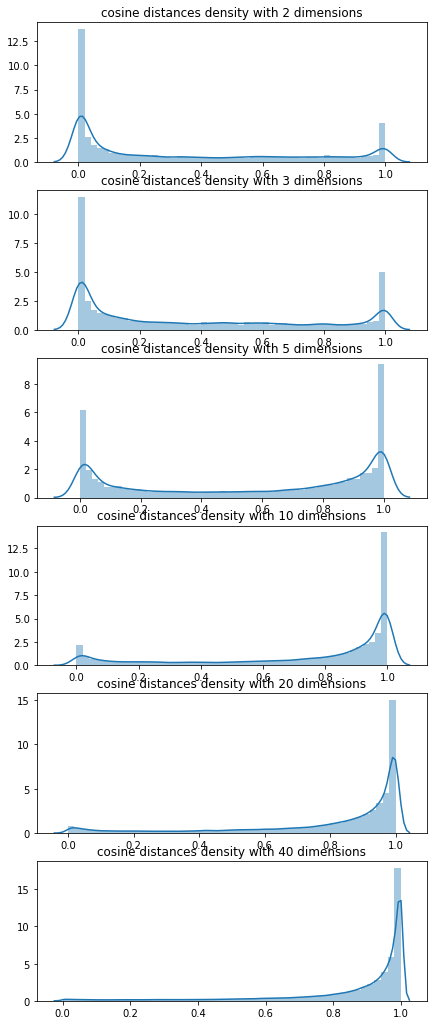

In [182]:
ks = [2,3,5,10,20,40]
show_densities(get_nmf_doc,ks)